## Naive Bayes

* Features are conditionally independent of each other, given the class label
* Continuous features are normally distributed
* Discrete features are multinomial distribution
* No missing data

P(A|B) = P(B|A)* P(A)/P(B),

* P(A), priori
* P(B) Marginal prob, prob of evidance
* P(A|B) posterori prob
* P(B|A) likelihood

P(y|X) = P(X|y)* P(y)/P(X) As as features are independent,

P(y|X) = P(x1|y)*P(x2|y)*P(xn|y) * P(y) / P(x1)*P(x2)*P(xn)

Advantages:
* It is simple and easy to implement
* It doesn’t require as much training data
* It handles both continuous and discrete data
* It is highly scalable with the number of predictors and data points
* It is fast and can be used to make real-time predictions
* It is not sensitive to irrelevant features .
* Effective in cases with a large number of features.

* Gaussian Naïve Bayes (GaussianNB): This is a variant of the Naïve Bayes classifier, which is used with Gaussian distributions—i.e. normal distributions—and continuous variables. This model is fitted by finding the mean and standard deviation of each class. 
* Multinomial Naïve Bayes (MultinomialNB): This type of Naïve Bayes classifier assumes that the features are from multinomial distributions. This variant is useful when using discrete data, such as frequency counts, and it is typically applied within natural language processing use cases, like spam classification. 
* Bernoulli Naïve Bayes (BernoulliNB): This is another variant of the Naïve Bayes classifier, which is used with Boolean variables—that is, variables with two values, such as True and False or 1 and 0. 
* CategoricalNB:
* ComplementNB : 

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import math

import matplotlib.pyplot as plt

In [122]:
df = pd.read_csv("data/weather.csv", sep='\s+')

In [10]:
df.head()

,Outlook,Temp,Humidity,Windy,Play
0,Rainy,Hot,High,f,no
1,Rainy,Hot,High,t,no
2,Overcast,Hot,High,f,yes
3,Sunny,Mild,High,f,yes
4,Sunny,Cool,Normal,f,yes


In [12]:
df.Play.value_counts()

Play
yes    9
no     5
Name: count, dtype: int64

In [123]:
def pre_processing(df):

	""" partioning data into features and target """

	X = df.drop([df.columns[-1]], axis = 1)
	y = df[df.columns[-1]]

	return X, y

X,y = pre_processing(df)

In [16]:
def accuracy_score(y_true, y_pred):

	"""	score = (y_true - y_pred) / len(y_true) """

	return round(float(sum(y_pred == y_true))/float(len(y_true)) * 100 ,2)

In [18]:
class  NaiveBayes:

	"""
		Bayes Theorem:
										Likelihood * Class prior probability
				Posterior Probability = -------------------------------------
											Predictor prior probability
				
							  			 P(x|c) * p(c)
							   P(c|x) = ------------------ 
											  P(x)
	"""

	def __init__(self):

		"""
			Attributes:
				likelihoods: Likelihood of each feature per class
				class_priors: Prior probabilities of classes 
				pred_priors: Prior probabilities of features 
				features: All features of dataset
		"""
		self.features = list
		self.likelihoods = {}
		self.class_priors = {}
		self.pred_priors = {}

		self.X_train = np.array
		self.y_train = np.array
		self.train_size = int
		self.num_feats = int

	def fit(self, X, y):

		self.features = list(X.columns)
		self.X_train = X
		self.y_train = y
		self.train_size = X.shape[0]
		self.num_feats = X.shape[1]

		for feature in self.features:
			self.likelihoods[feature] = {}
			self.pred_priors[feature] = {}

			for feat_val in np.unique(self.X_train[feature]):
				self.pred_priors[feature].update({feat_val: 0})

				for outcome in np.unique(self.y_train):
					self.likelihoods[feature].update({feat_val+'_'+outcome:0})
					self.class_priors.update({outcome: 0})

		self._calc_class_prior()
		self._calc_likelihoods()
		self._calc_predictor_prior()

	def _calc_class_prior(self):

		""" P(c) - Prior Class Probability """

		for outcome in np.unique(self.y_train):
			outcome_count = sum(self.y_train == outcome)
			self.class_priors[outcome] = outcome_count / self.train_size

	def _calc_likelihoods(self):

		""" P(x|c) - Likelihood """

		for feature in self.features:

			for outcome in np.unique(self.y_train):
				outcome_count = sum(self.y_train == outcome)
				feat_likelihood = self.X_train[feature][self.y_train[self.y_train == outcome].index.values.tolist()].value_counts().to_dict()

				for feat_val, count in feat_likelihood.items():
					self.likelihoods[feature][feat_val + '_' + outcome] = count/outcome_count


	def _calc_predictor_prior(self):

		""" P(x) - Evidence """

		for feature in self.features:
			feat_vals = self.X_train[feature].value_counts().to_dict()

			for feat_val, count in feat_vals.items():
				self.pred_priors[feature][feat_val] = count/self.train_size


	def predict(self, X):

		""" Calculates Posterior probability P(c|x) """

		results = []
		X = np.array(X)

		for query in X:
			probs_outcome = {}
			for outcome in np.unique(self.y_train):
				prior = self.class_priors[outcome]
				likelihood = 1
				evidence = 1

				for feat, feat_val in zip(self.features, query):
					likelihood *= self.likelihoods[feat][feat_val + '_' + outcome]
					evidence *= self.pred_priors[feat][feat_val]

				posterior = (likelihood * prior) / (evidence)

				probs_outcome[outcome] = posterior

			result = max(probs_outcome, key = lambda x: probs_outcome[x])
			results.append(result)

		return np.array(results)

In [19]:
nb_clf = NaiveBayes()
nb_clf.fit(X, y)

print("Train Accuracy: {}".format(accuracy_score(y, nb_clf.predict(X))))

Train Accuracy: 92.86


In [20]:
#Query 1:
query = np.array([['Rainy','Mild', 'Normal', 't']])
print("Query 1:- {} ---> {}".format(query, nb_clf.predict(query)))

Query 1:- [['Rainy' 'Mild' 'Normal' 't']] ---> ['yes']


### GaussianNB (Variables should be continuous)

For gaussian:

The distribution is symmetric: its mean, median and mode have the same value. Half of the data will be less than the mean while the other half will be more than the mean.

* About 68% of all data values will fall within +/- 1 standard deviation of the mean.
* About 95% of all data values will fall within +/- 2 standard deviations of the mean.
* About 99.7% of all data values will fall within +/- 3 standard deviations of the mean.

In [49]:
X.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [101]:
X[0],parameters=boxcox(X[0])

In [103]:
from sklearn.datasets import load_iris
from scipy.stats import boxcox
iris = load_iris()
X = pd.DataFrame(load_iris()["data"]).copy()

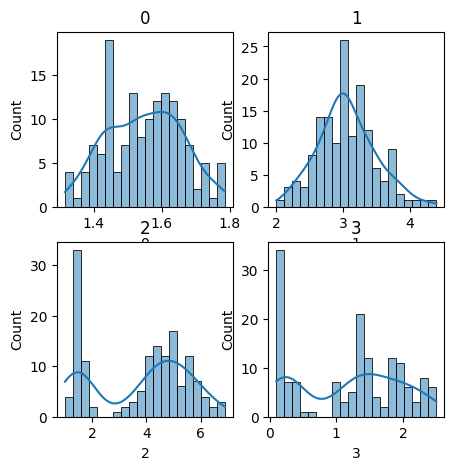

In [102]:
fig,ax = plt.subplots(2,2,figsize=(5,5))
row = col = 0
for n,c in enumerate(X.columns):
    if (n%2 == 0) & (n > 0):
        row += 1
        col = 0
    sns.histplot(X[c], kde="True", ax=ax[row,col], bins=20)
    ax[row,col].set_title(c)
    col += 1

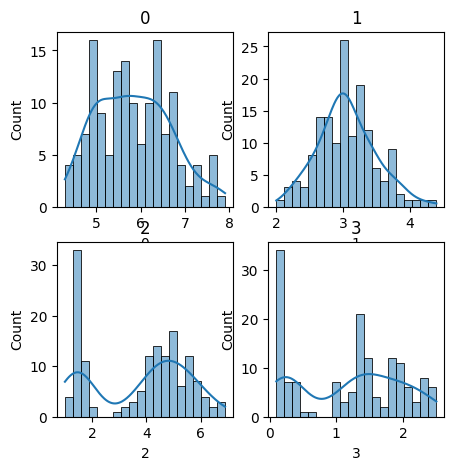

In [104]:
fig,ax = plt.subplots(2,2,figsize=(5,5))
row = col = 0
for n,c in enumerate(X.columns):
    if (n%2 == 0) & (n > 0):
        row += 1
        col = 0
    sns.histplot(X[c], kde="True", ax=ax[row,col], bins=20)
    ax[row,col].set_title(c)
    col += 1

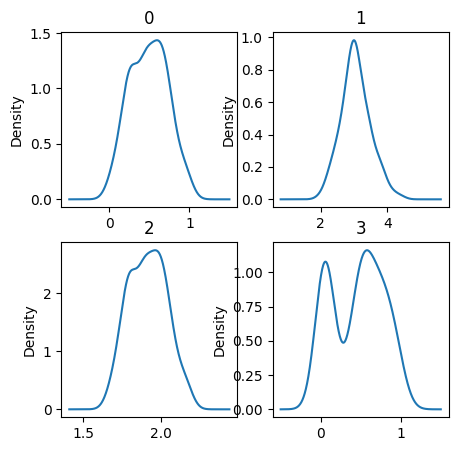

In [66]:
fig,ax = plt.subplots(2,2,figsize=(5,5))
row = col = 0
for n,c in enumerate(X.columns):
    if (n%2 == 0) & (n > 0):
        row += 1
        col = 0
    X[c].plot(kind="kde",ax=ax[row,col])
    ax[row,col].set_title(c)
    col += 1

In [65]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X[0] = sc.fit_transform(X[[0]])

In [135]:
from sklearn.datasets import load_iris
iris = load_iris()
   
# store the feature matrix (X) and response vector (y)
X = iris.data
y = iris.target
# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(120, 4) (30, 4) (120,) (30,)


In [25]:
# training the model on training set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [67]:
# making predictions on the testing set
y_pred = gnb.predict(X_test)

# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 96.66666666666667


### Multinomial NB ( for Discrete features but integers)

In [127]:
import numpy as np
rng = np.random.RandomState(1)
X = rng.randint(5, size = (6,100))
y = np.array([1, 2, 3, 4, 5, 6])


In [145]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X, y)
pred = clf.predict(X[2:3])
pred

array([0])

In [146]:
clf.predict_proba(X[2:3])

array([[0.71652351, 0.18033185, 0.10314464]])

In [147]:
clf.feature_log_prob_ # P(Xi|y)

array([[-0.70991782, -1.08674791, -1.93114973, -3.64880123],
       [-0.88088275, -1.63924027, -1.21132886, -2.36814464],
       [-0.95779046, -1.74946121, -1.12831744, -2.13018483]])

In [148]:
clf.class_log_prior_

array([-1.09861229, -1.09861229, -1.09861229])

### BernoulliNB (For multivariant data) (Designed for boolean/binary features)

In [149]:
import numpy as np
rng = np.random.RandomState(1)
X = rng.randint(5, size=(6, 100))
Y = np.array([1, 2, 3, 4, 4, 5])

In [154]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB(binarize=True) # Threshold for mapping to booleans. If None, input is presumed to already consist of binary vectors.
clf.fit(X, Y)
print(clf.predict(X[2:3]))

[3]


In [157]:
clf.feature_log_prob_

array([[-0.40546511, -0.40546511, -1.09861229, -1.09861229, -0.40546511,
        -1.09861229, -1.09861229, -1.09861229, -0.40546511, -0.40546511,
        -1.09861229, -0.40546511, -0.40546511, -0.40546511, -0.40546511,
        -0.40546511, -0.40546511, -0.40546511, -0.40546511, -0.40546511,
        -0.40546511, -1.09861229, -1.09861229, -1.09861229, -1.09861229,
        -1.09861229, -1.09861229, -1.09861229, -1.09861229, -0.40546511,
        -1.09861229, -1.09861229, -1.09861229, -0.40546511, -0.40546511,
        -1.09861229, -1.09861229, -0.40546511, -1.09861229, -1.09861229,
        -0.40546511, -0.40546511, -1.09861229, -1.09861229, -0.40546511,
        -0.40546511, -0.40546511, -0.40546511, -1.09861229, -0.40546511,
        -1.09861229, -0.40546511, -1.09861229, -0.40546511, -1.09861229,
        -0.40546511, -0.40546511, -1.09861229, -1.09861229, -1.09861229,
        -0.40546511, -0.40546511, -0.40546511, -1.09861229, -0.40546511,
        -1.09861229, -1.09861229, -0.40546511, -0.4

* PDF: For continuous variable. Defines the probability of a valuse taken by the variable.
* CDF: for both continuous and discrete varibale. Defines the probability of X been less thn or equal to the value.
* CDF = Interation of PDF
* PDF = Differentiation of CDF
